In [1]:
import numpy as np

from boela import problems
from boela.ela import vm_triples, vm_features
from boela.ela.vm_triples import _calc_angle, _calc_dx_norm
from boela.problems.problem import ProblemBase
from boela.timer import set_timer


def pprint_triples(name, x, f, triples, time):
    dx_norm = _calc_dx_norm(x, triples)
    angles = _calc_angle(x, triples)

    x_ext, f_ext, triples_ext = vm_triples.extend(x, f, triples)
    mean_std = vm_triples._calc_std_mean(x_ext, f_ext, n_points=10_000)

    pairs = np.vstack([triples[:, [0, 1]], triples[:, [1, 2]]])
    unique_pairs = np.unique(pairs, axis=0)
    title = (
        f"\n\n{name}\n"
        f"built in {time:.2f}s {len(triples)} triples "
        f" [{len(unique_pairs)}/{len(pairs)} unique pairs]\n"
        f"  dx_norm: {dx_norm.mean():.2f} ± {dx_norm.ptp():.2f}\n"
        f"  angles: {angles.mean():.2f} ± {angles.ptp():.2f}\n"
        f"  mean_std: {mean_std:.6g}\n"
    )
    print(title)
    vm_triples.plot(x, triples, size=(5.2, 5), dpi=300)

    vm = vm_features.VariabilityMap(x, f, triples)
    vm.plot(size=(5.5, 5), dpi=300)



grid collect_fixed_step
built in 0.01s 226 triples  [122/452 unique pairs]
  dx_norm: 0.69 ± 0.63
  angles: 133.27 ± 86.41
  mean_std: 217.447



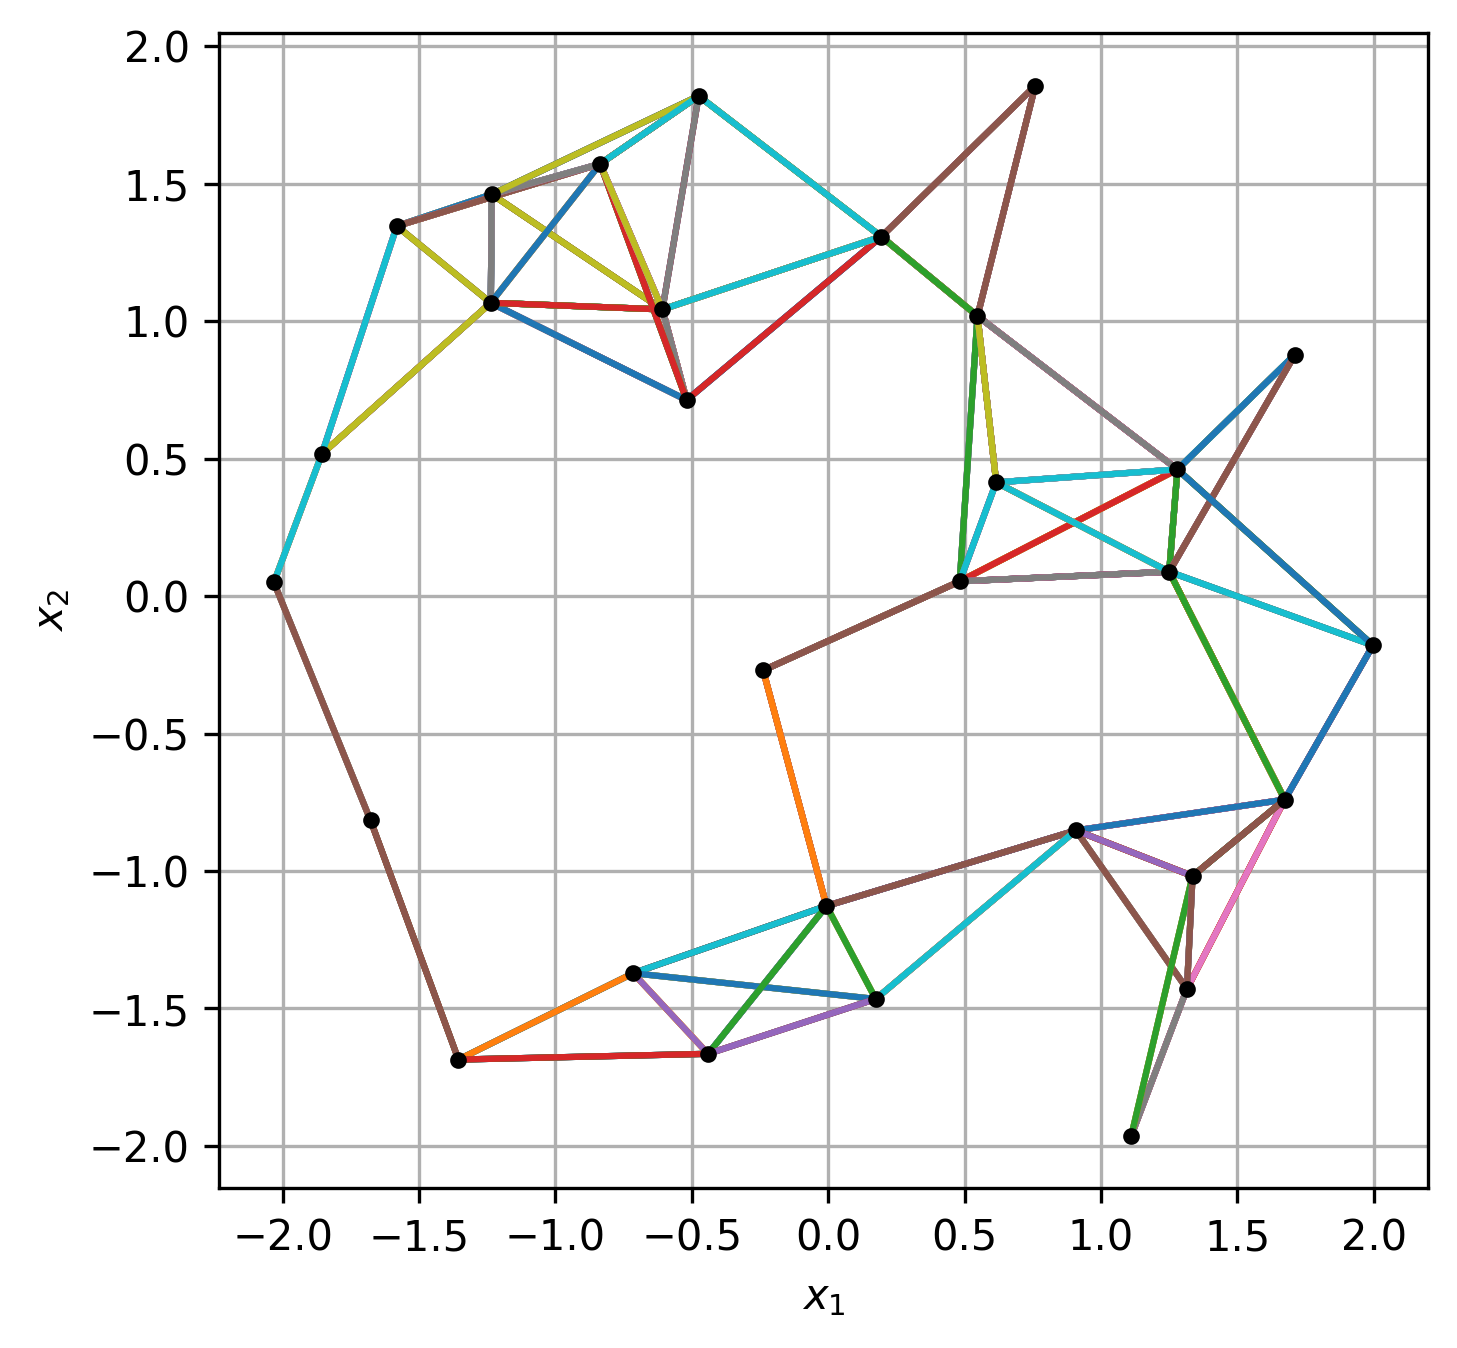

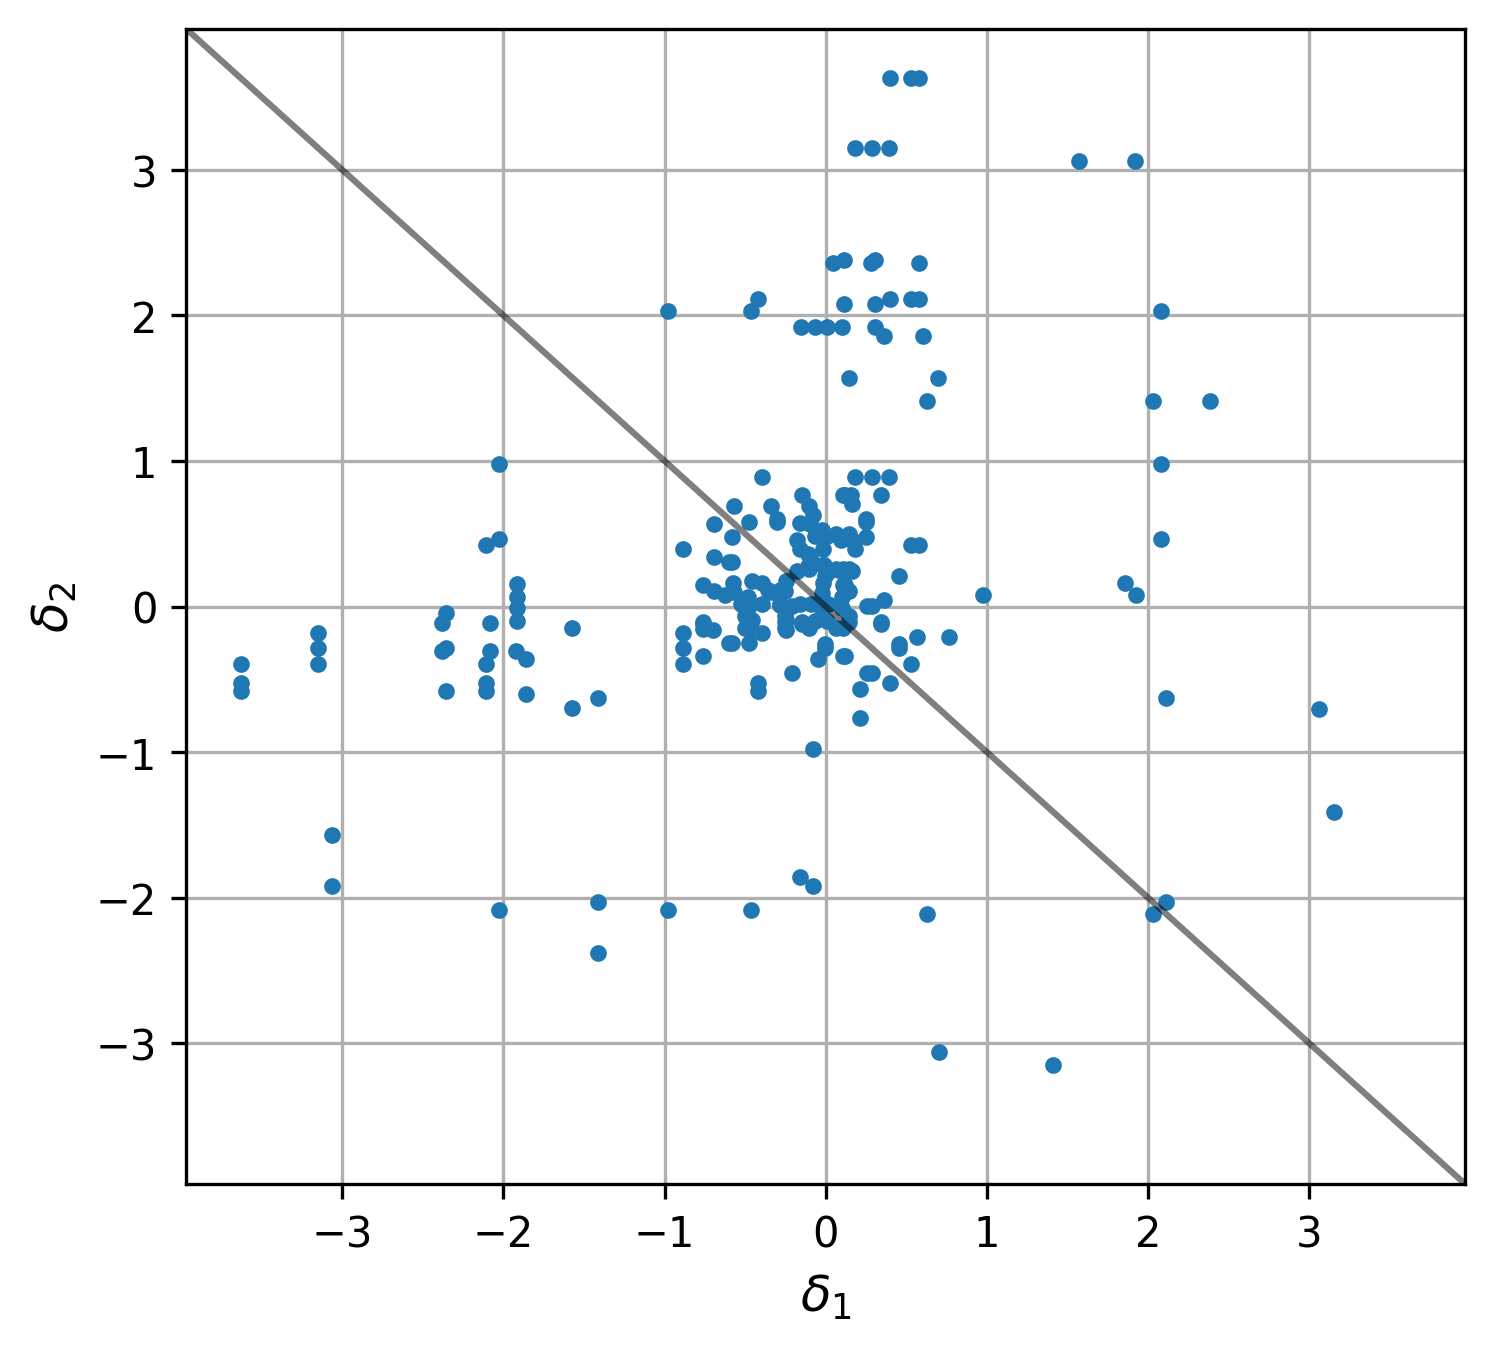



grid collect_fixed_step
built in 0.00s 226 triples  [184/452 unique pairs]
  dx_norm: 0.80 ± 1.82
  angles: 132.75 ± 89.24
  mean_std: 200.32



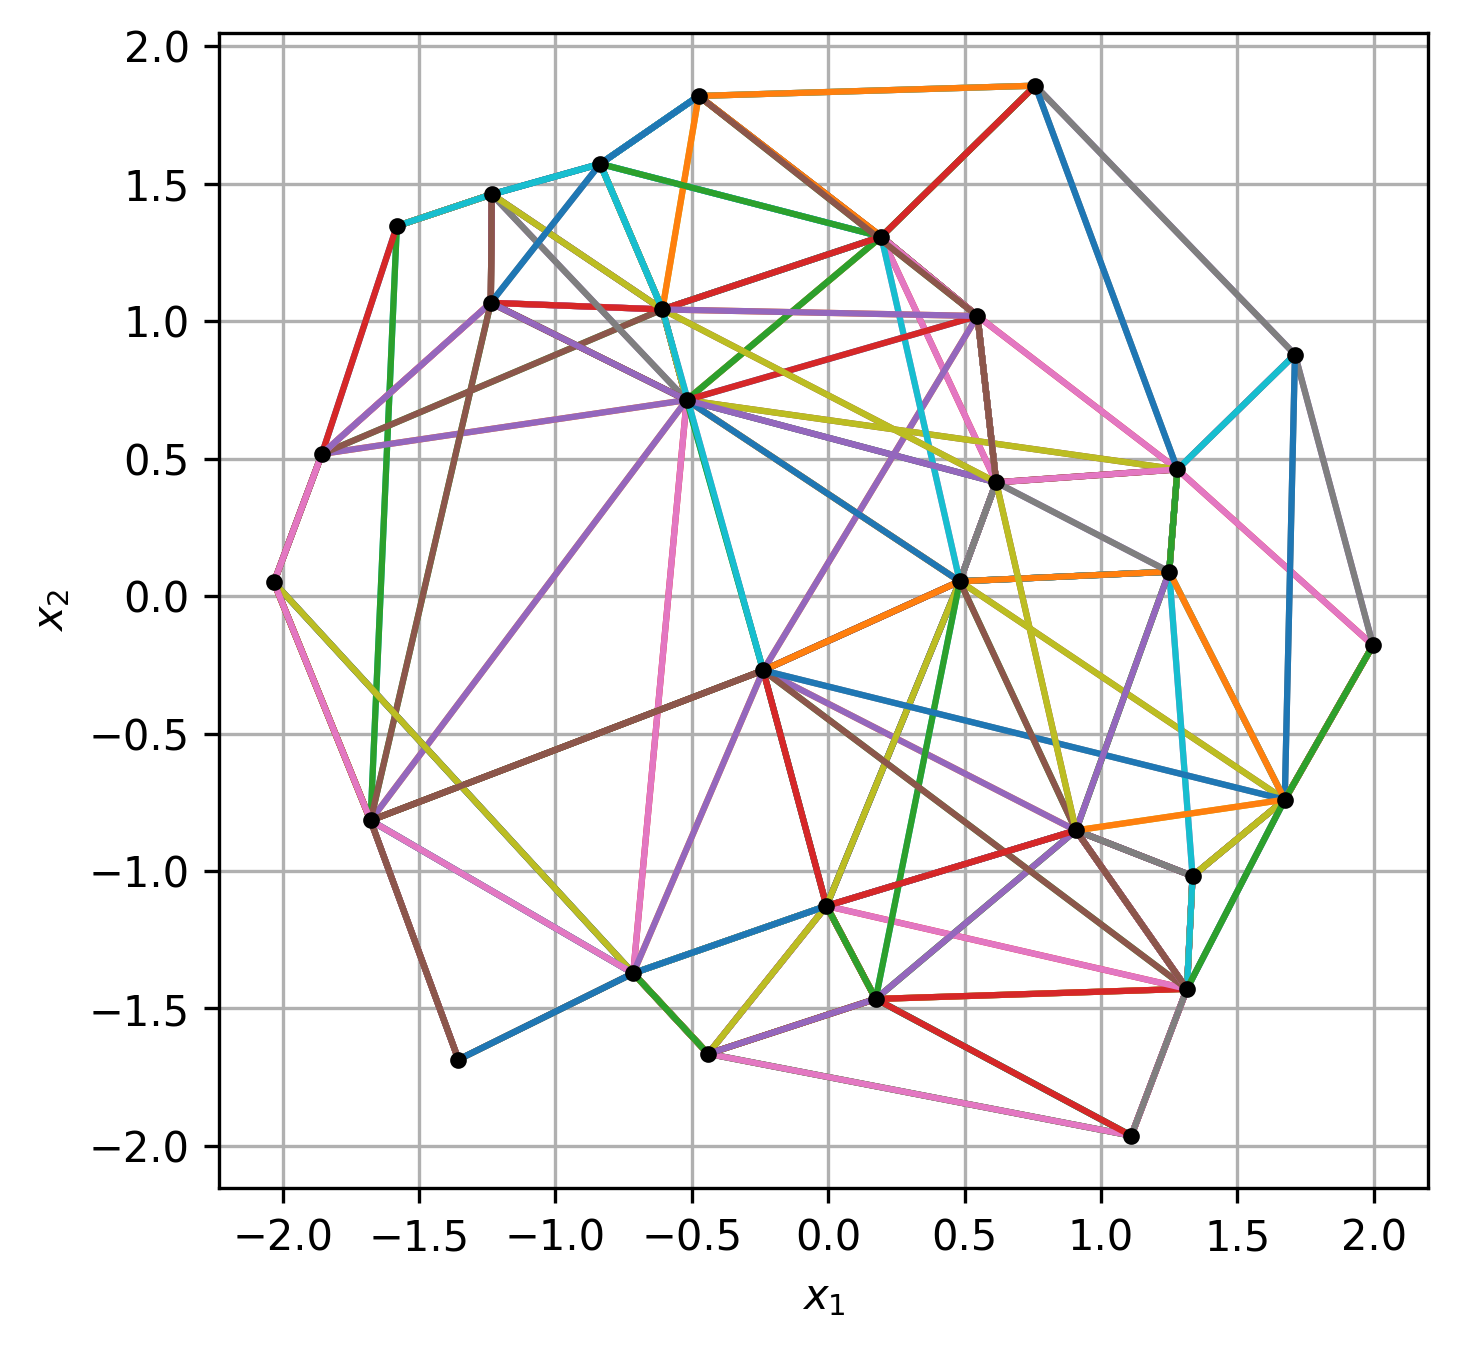

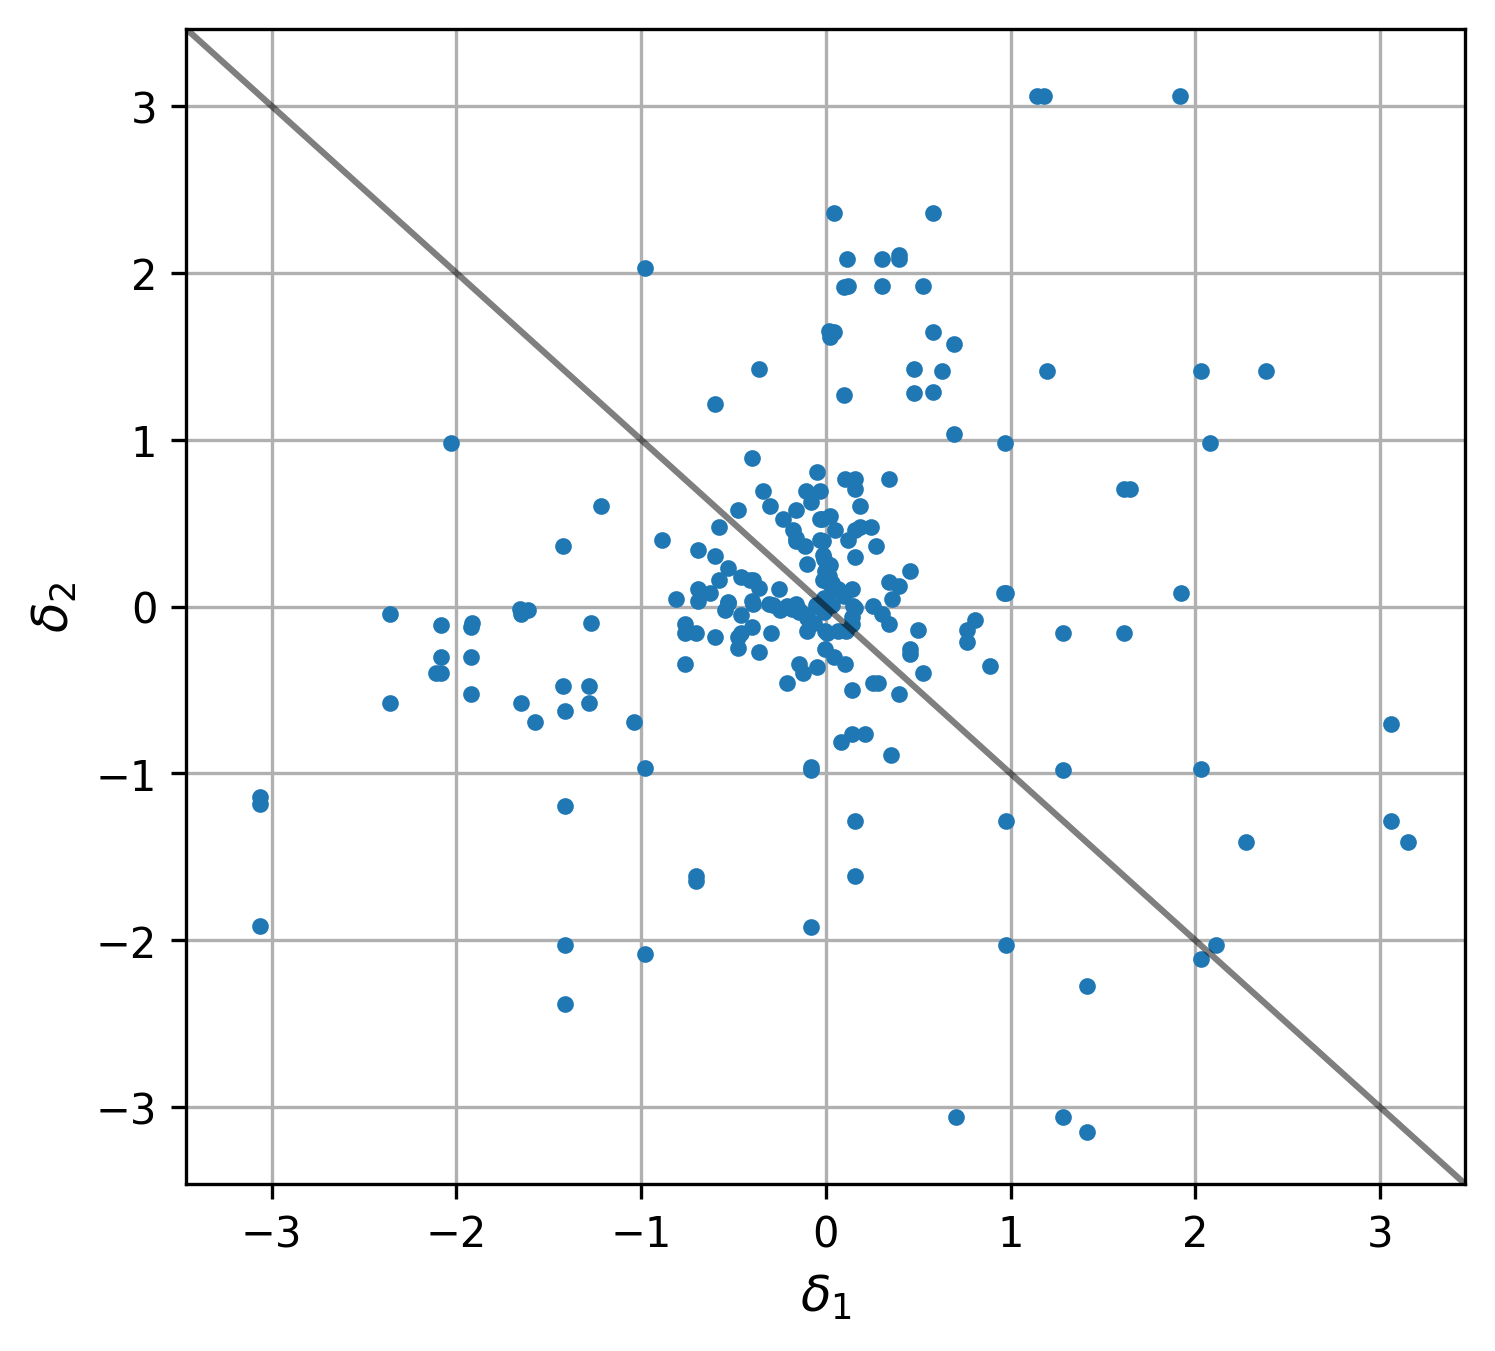



grid collect_fixed_step EXT
built in 0.00s 820 triples  [644/1640 unique pairs]
  dx_norm: 0.60 ± 2.11
  angles: 113.57 ± 180.00
  mean_std: 182.16



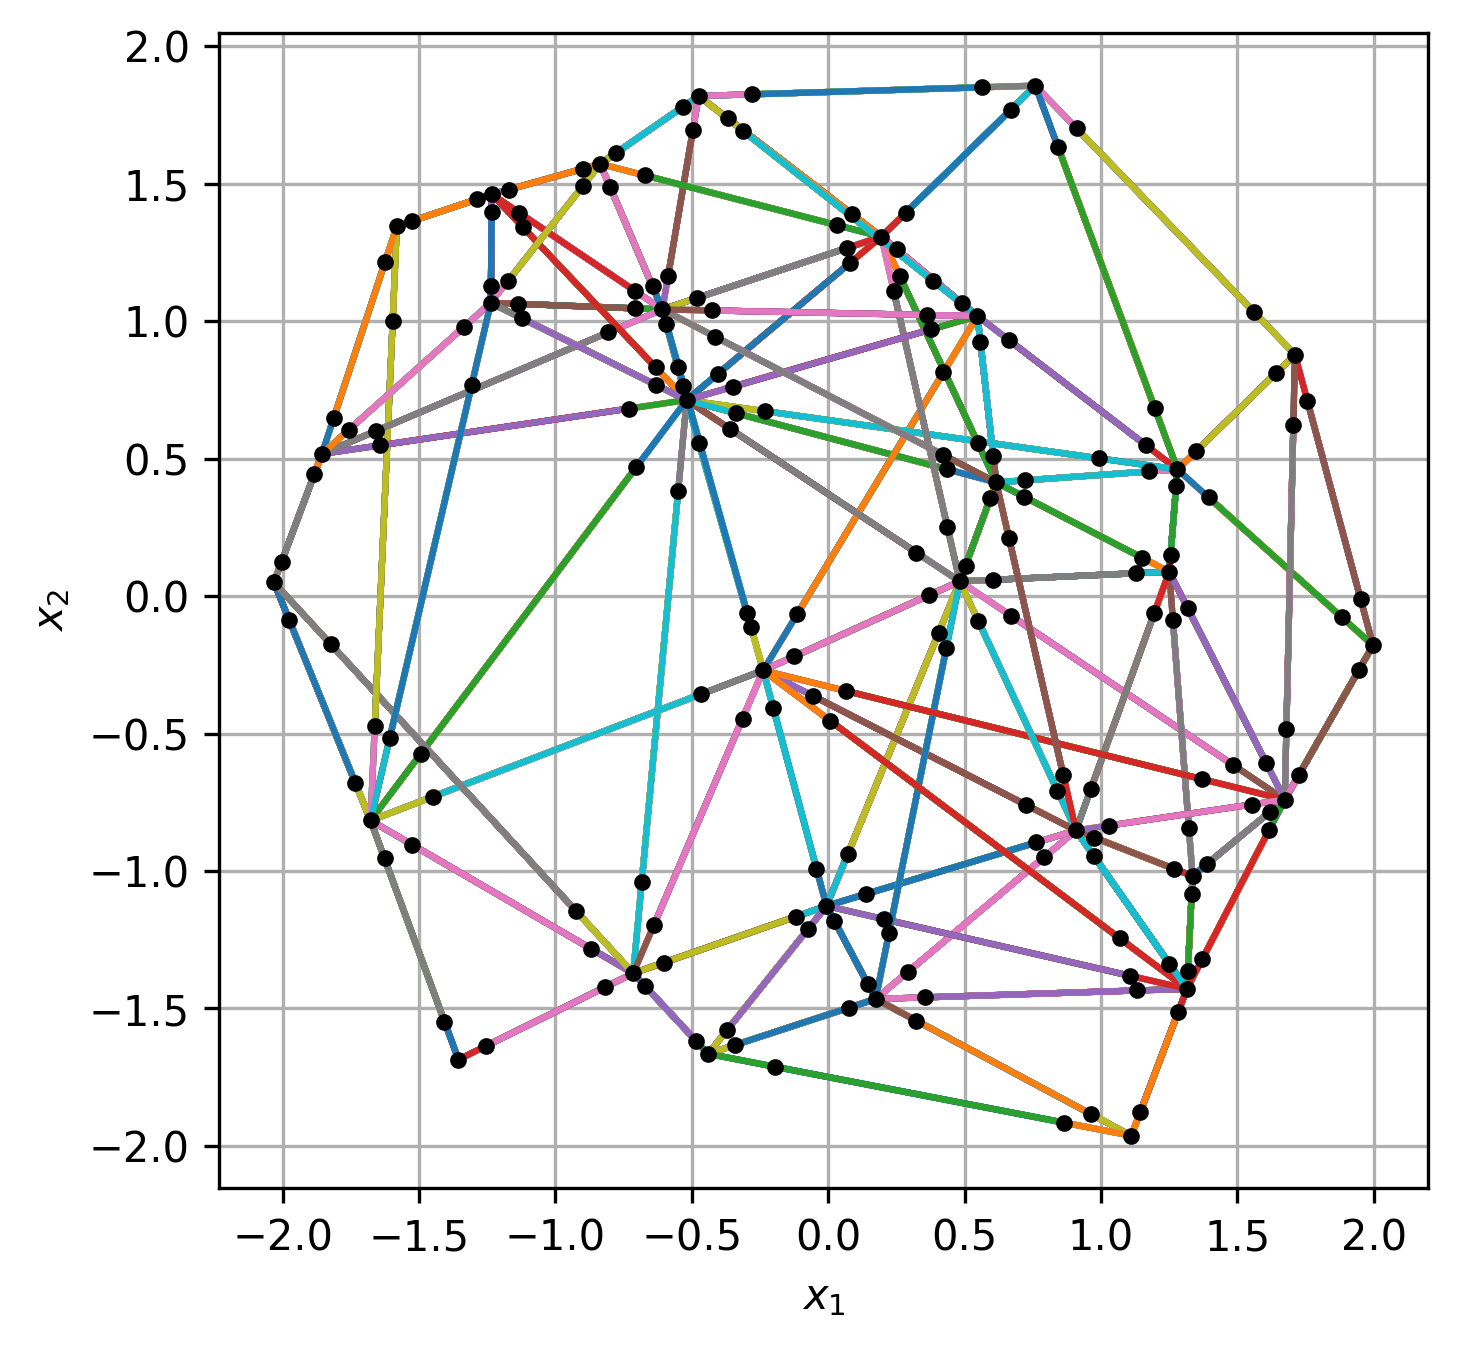

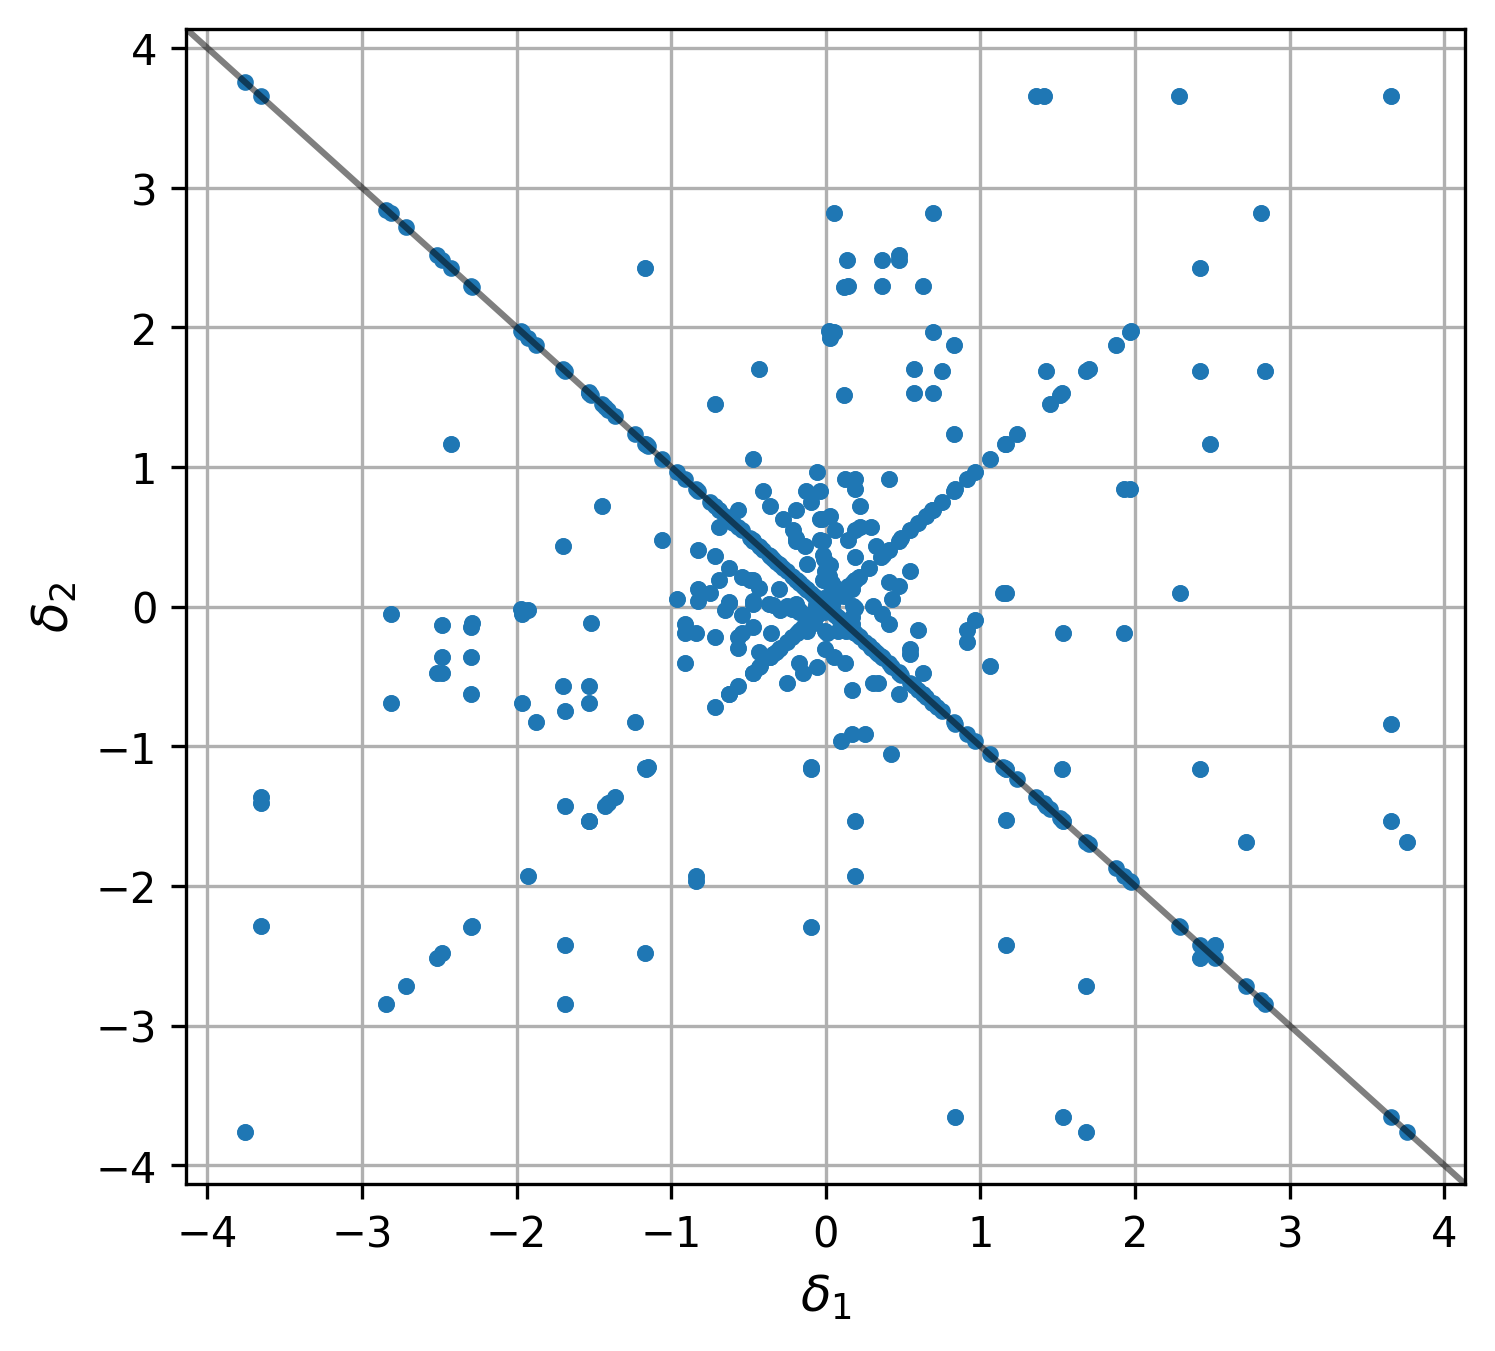

In [2]:
problem: ProblemBase = problems.f1.rosenbrock.Problem(2)
x, f = problem.sample_rand(30, seed=10)

with set_timer() as timer:
    triples = vm_triples.collect_fixed_step(x, symmetric=True)
pprint_triples(f"grid collect_fixed_step", x, f, triples, timer.time)

with set_timer() as timer:
    triples_new = vm_triples.collect_space_filling(x, n_triples=len(triples) / 2, symmetric=True)
pprint_triples(f"grid collect_fixed_step", x, f, triples_new, timer.time)

with set_timer() as timer:
    x_ext, f_ext, triples_ext = vm_triples.extend(x, f, triples_new, n_splits_min=2, n_splits_max=2)
pprint_triples(f"grid collect_fixed_step EXT", x_ext, f_ext, triples_ext, timer.time)



grid collect_fixed_step
built in 0.01s 182 triples  [153/364 unique pairs]
  dx_norm: 0.21 ± 0.12
  angles: 135.35 ± 88.18
  mean_std: 0.0558934



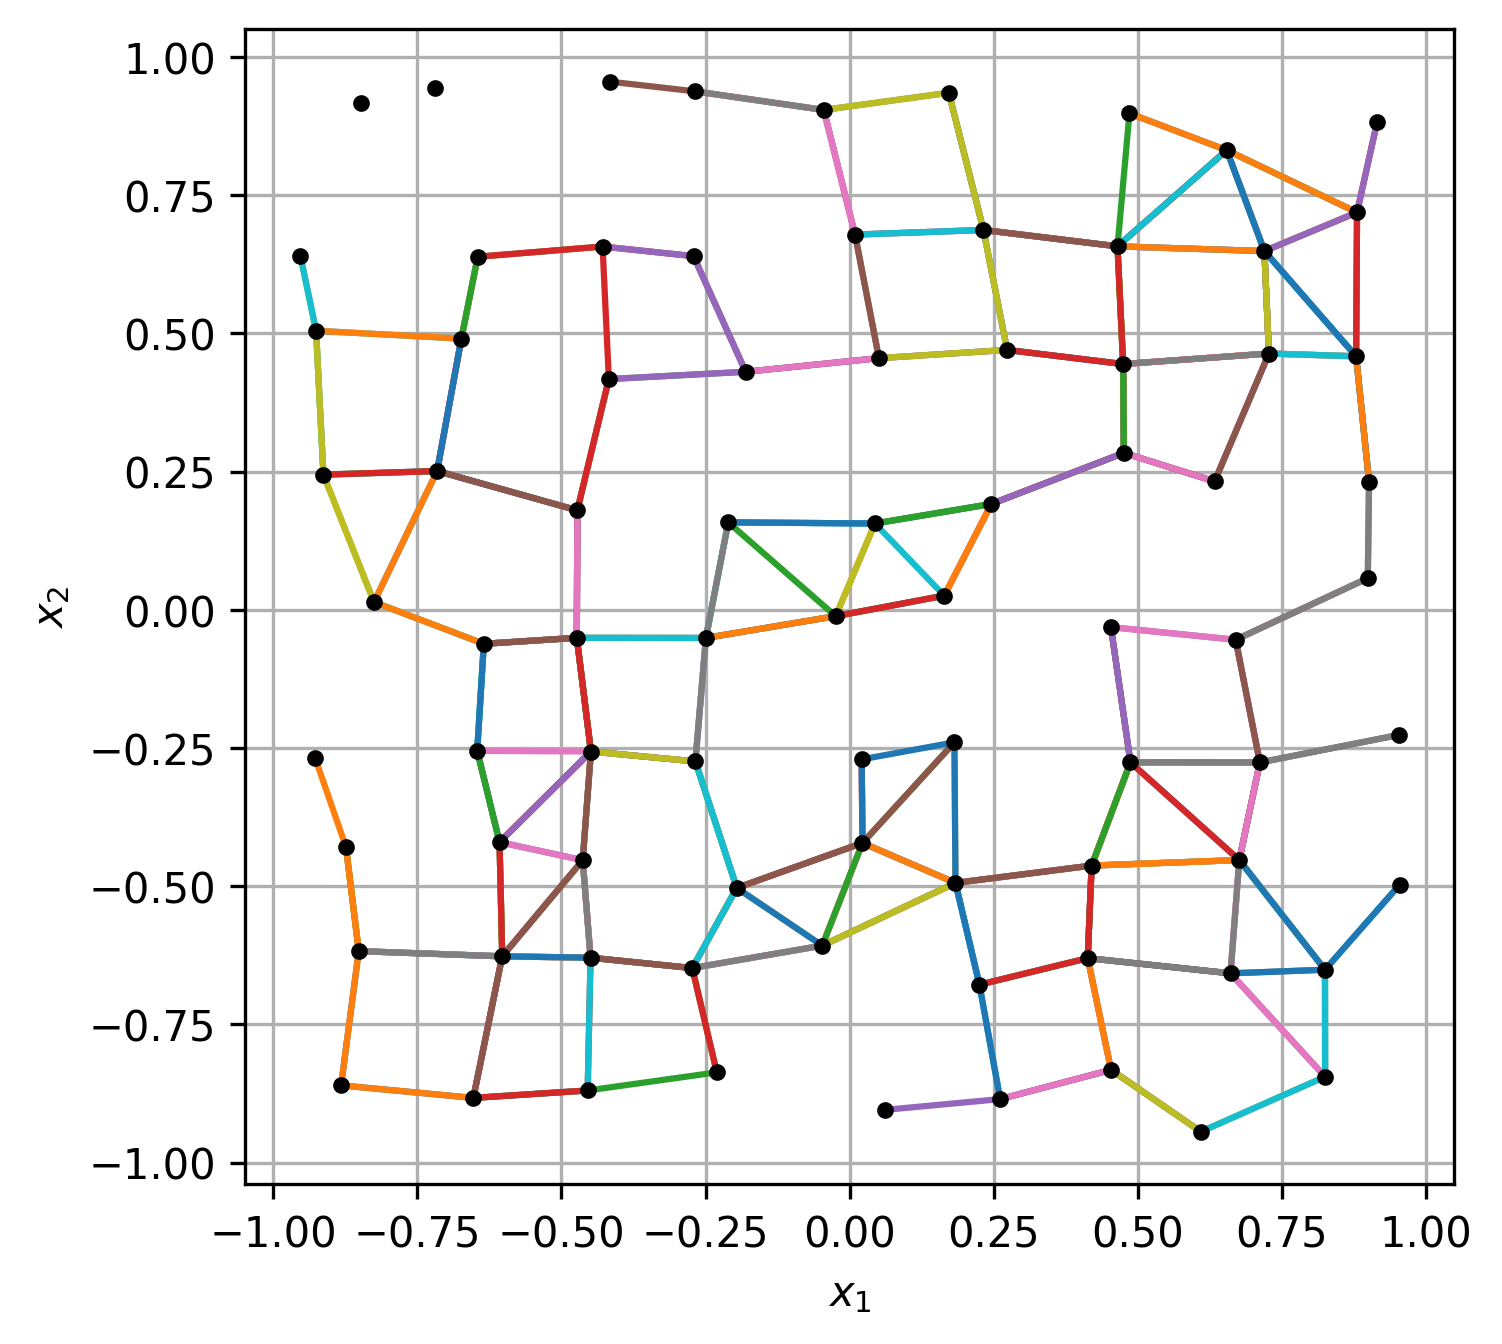

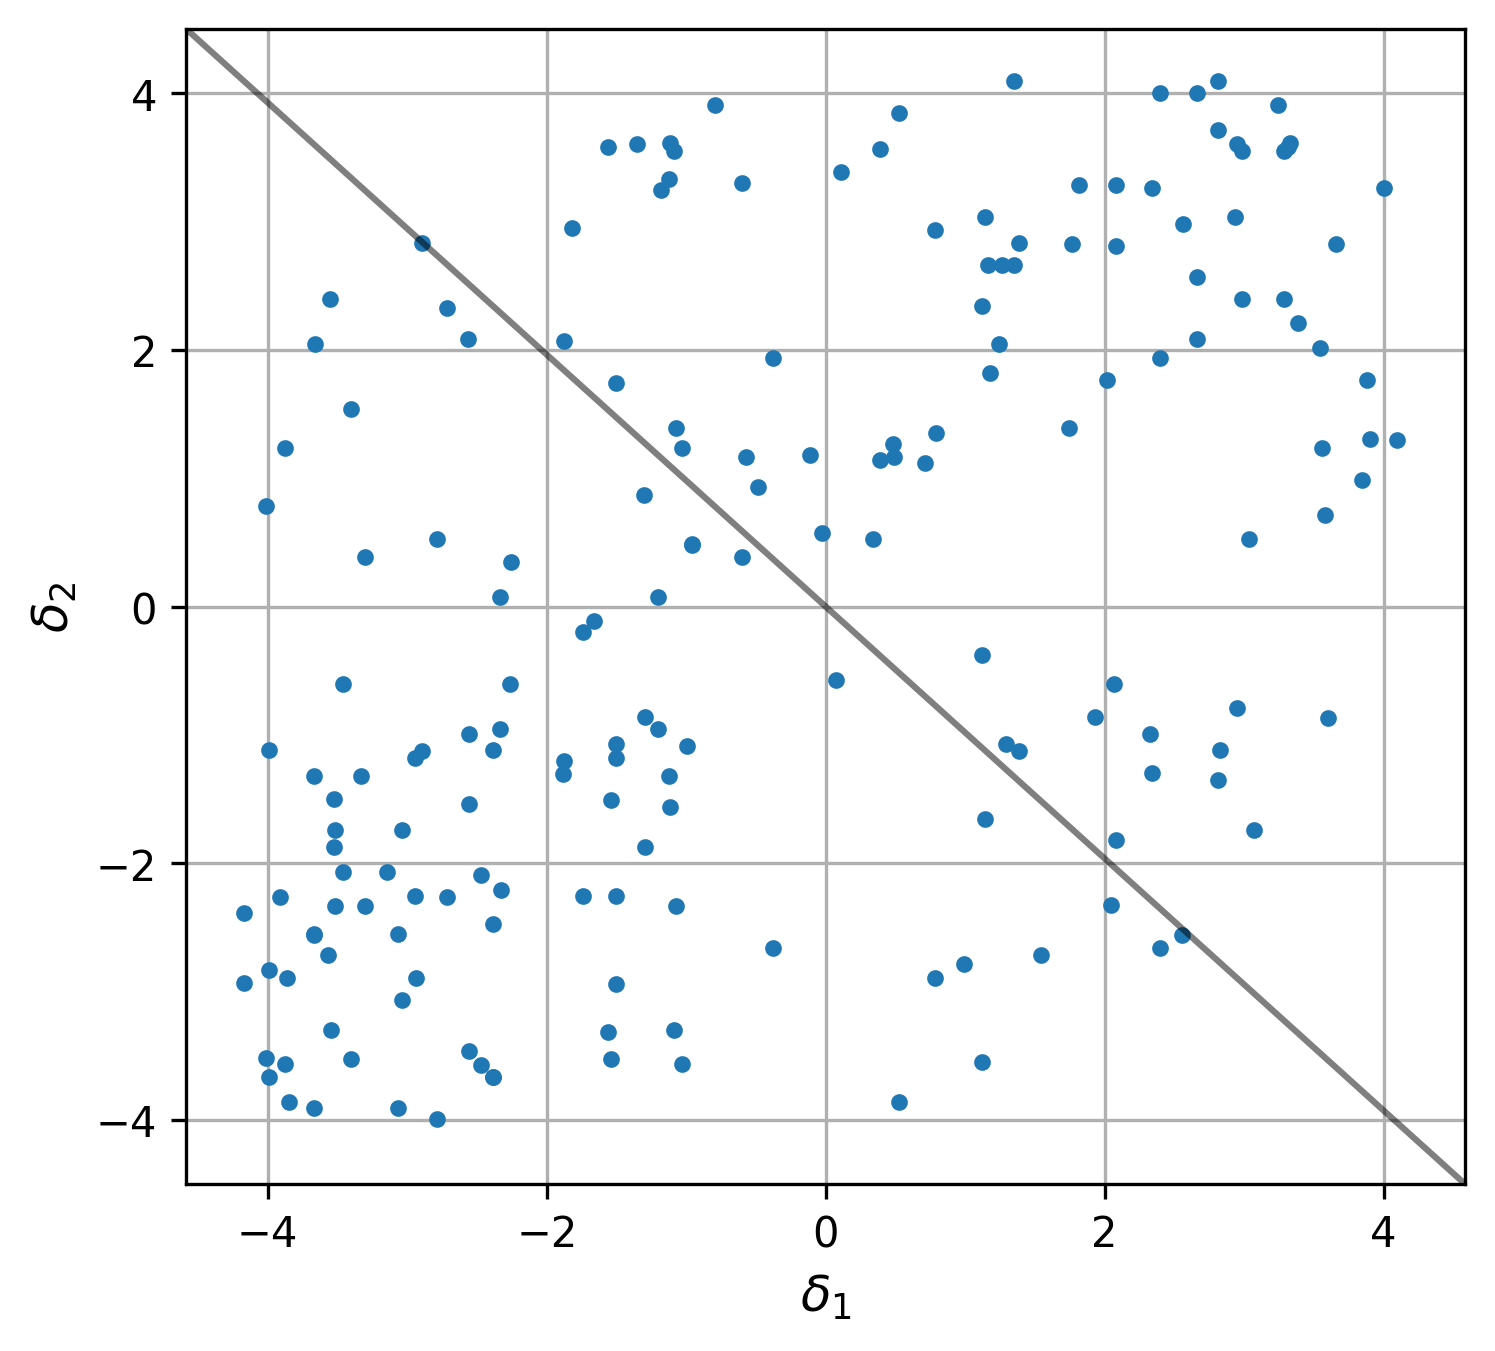



grid collect_space_filling
built in 0.00s 182 triples  [234/364 unique pairs]
  dx_norm: 0.24 ± 0.49
  angles: 133.85 ± 88.18
  mean_std: 0.0551189



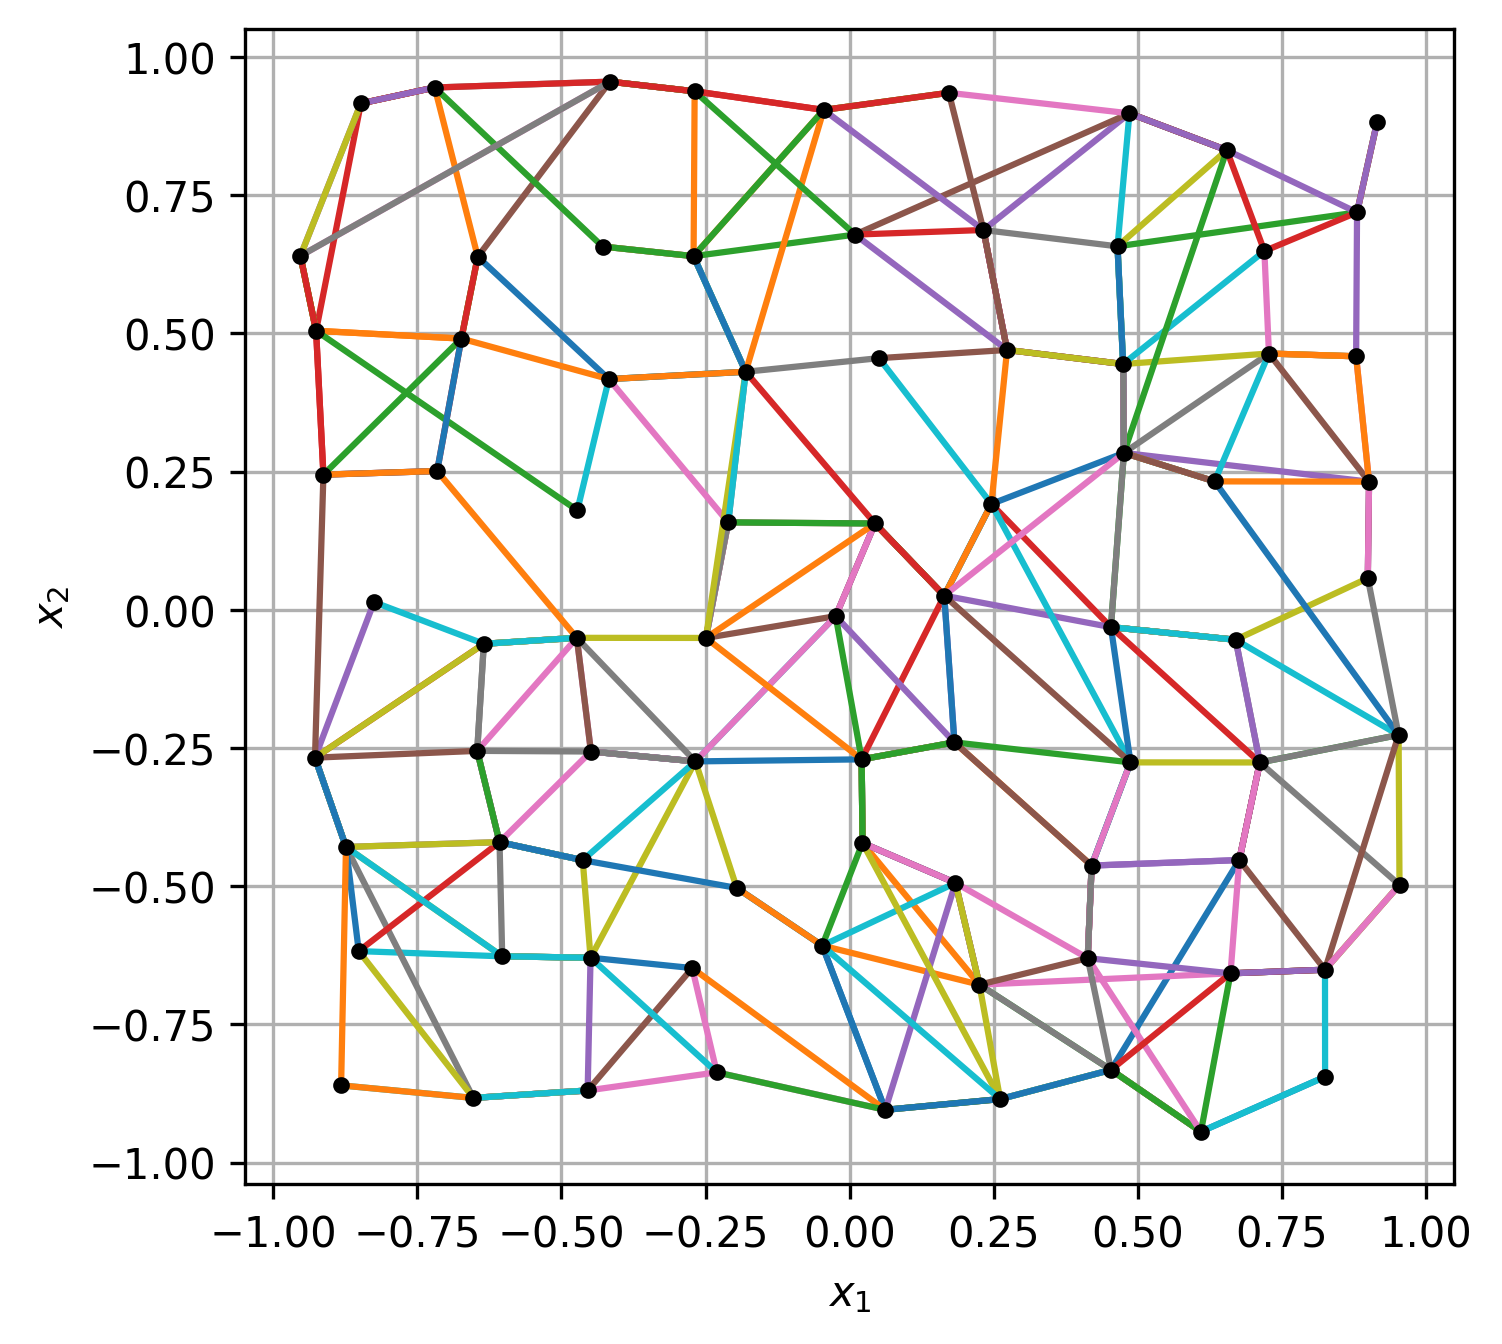

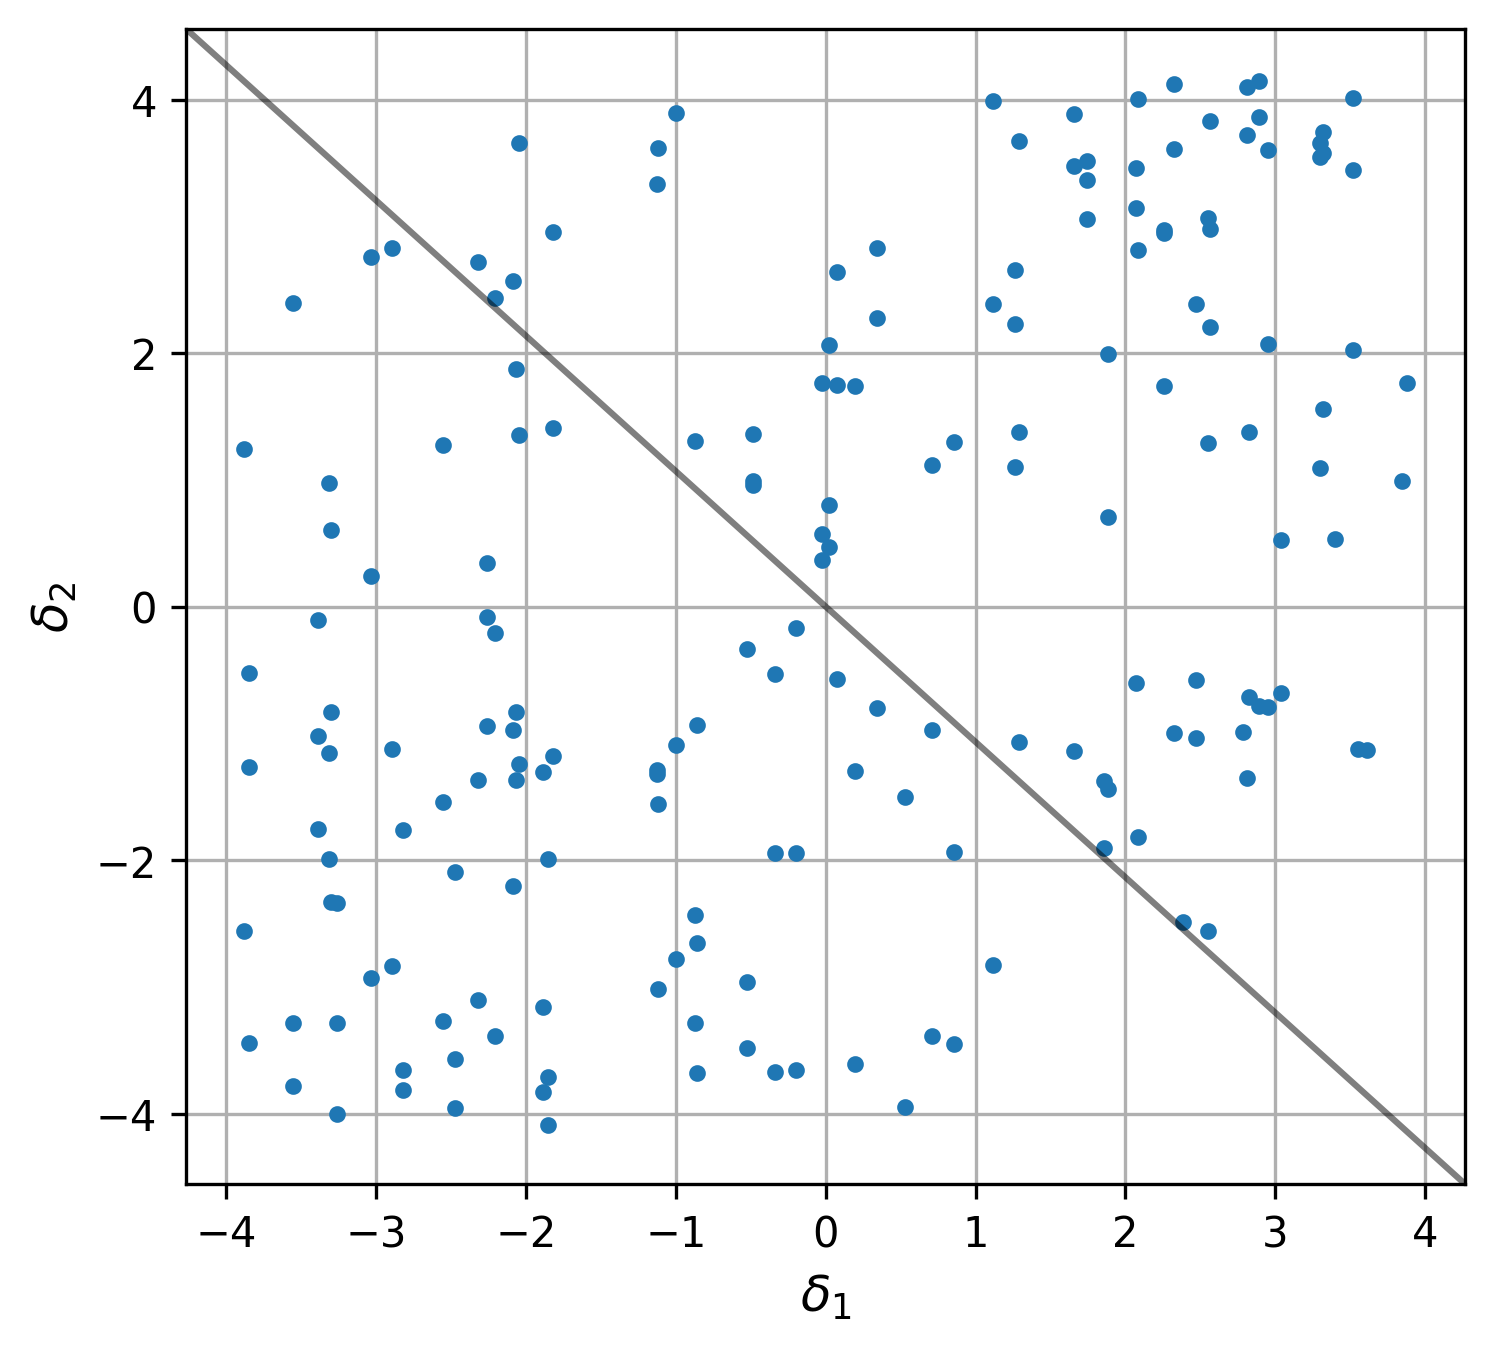



rand collect_fixed_step
built in 0.00s 529 triples  [348/1058 unique pairs]
  dx_norm: 0.21 ± 0.31
  angles: 136.41 ± 89.28
  mean_std: 0.0616866



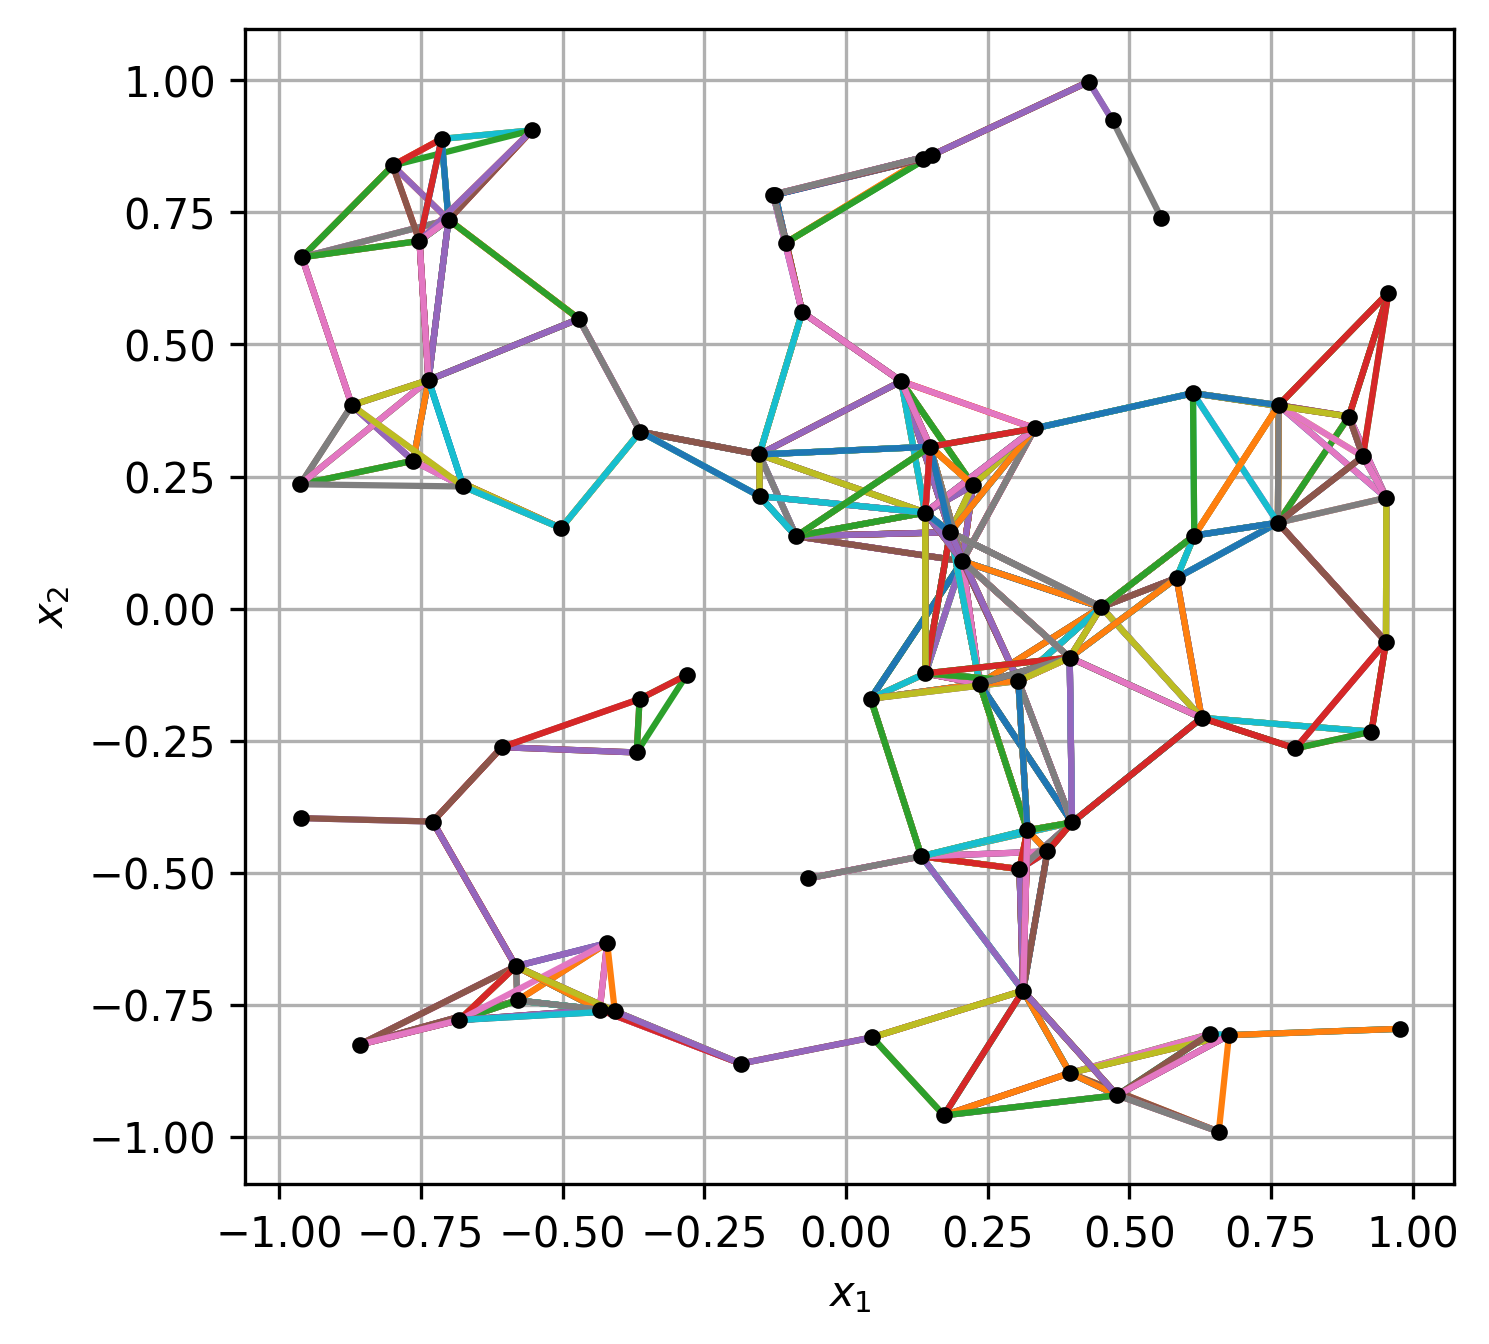

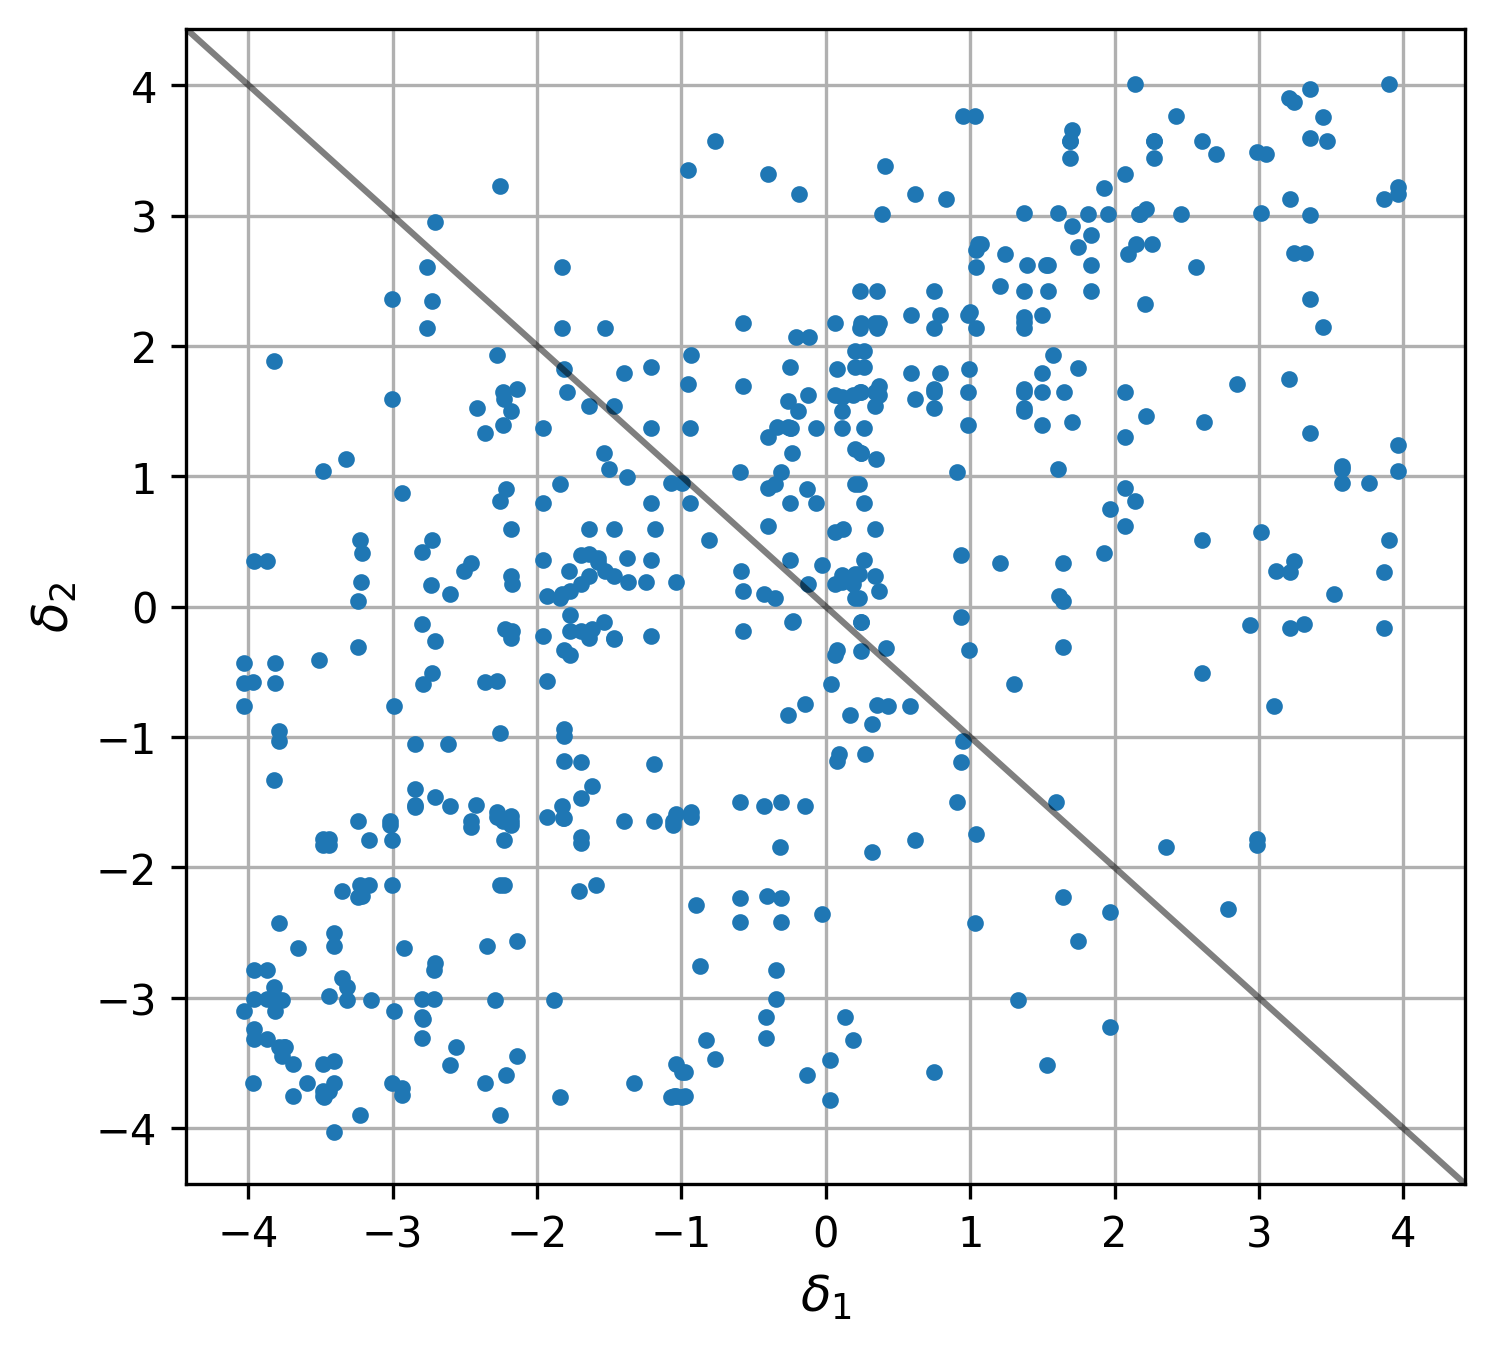



rand collect_space_filling
built in 0.03s 529 triples  [542/1058 unique pairs]
  dx_norm: 0.25 ± 1.04
  angles: 132.06 ± 89.81
  mean_std: 0.0546602



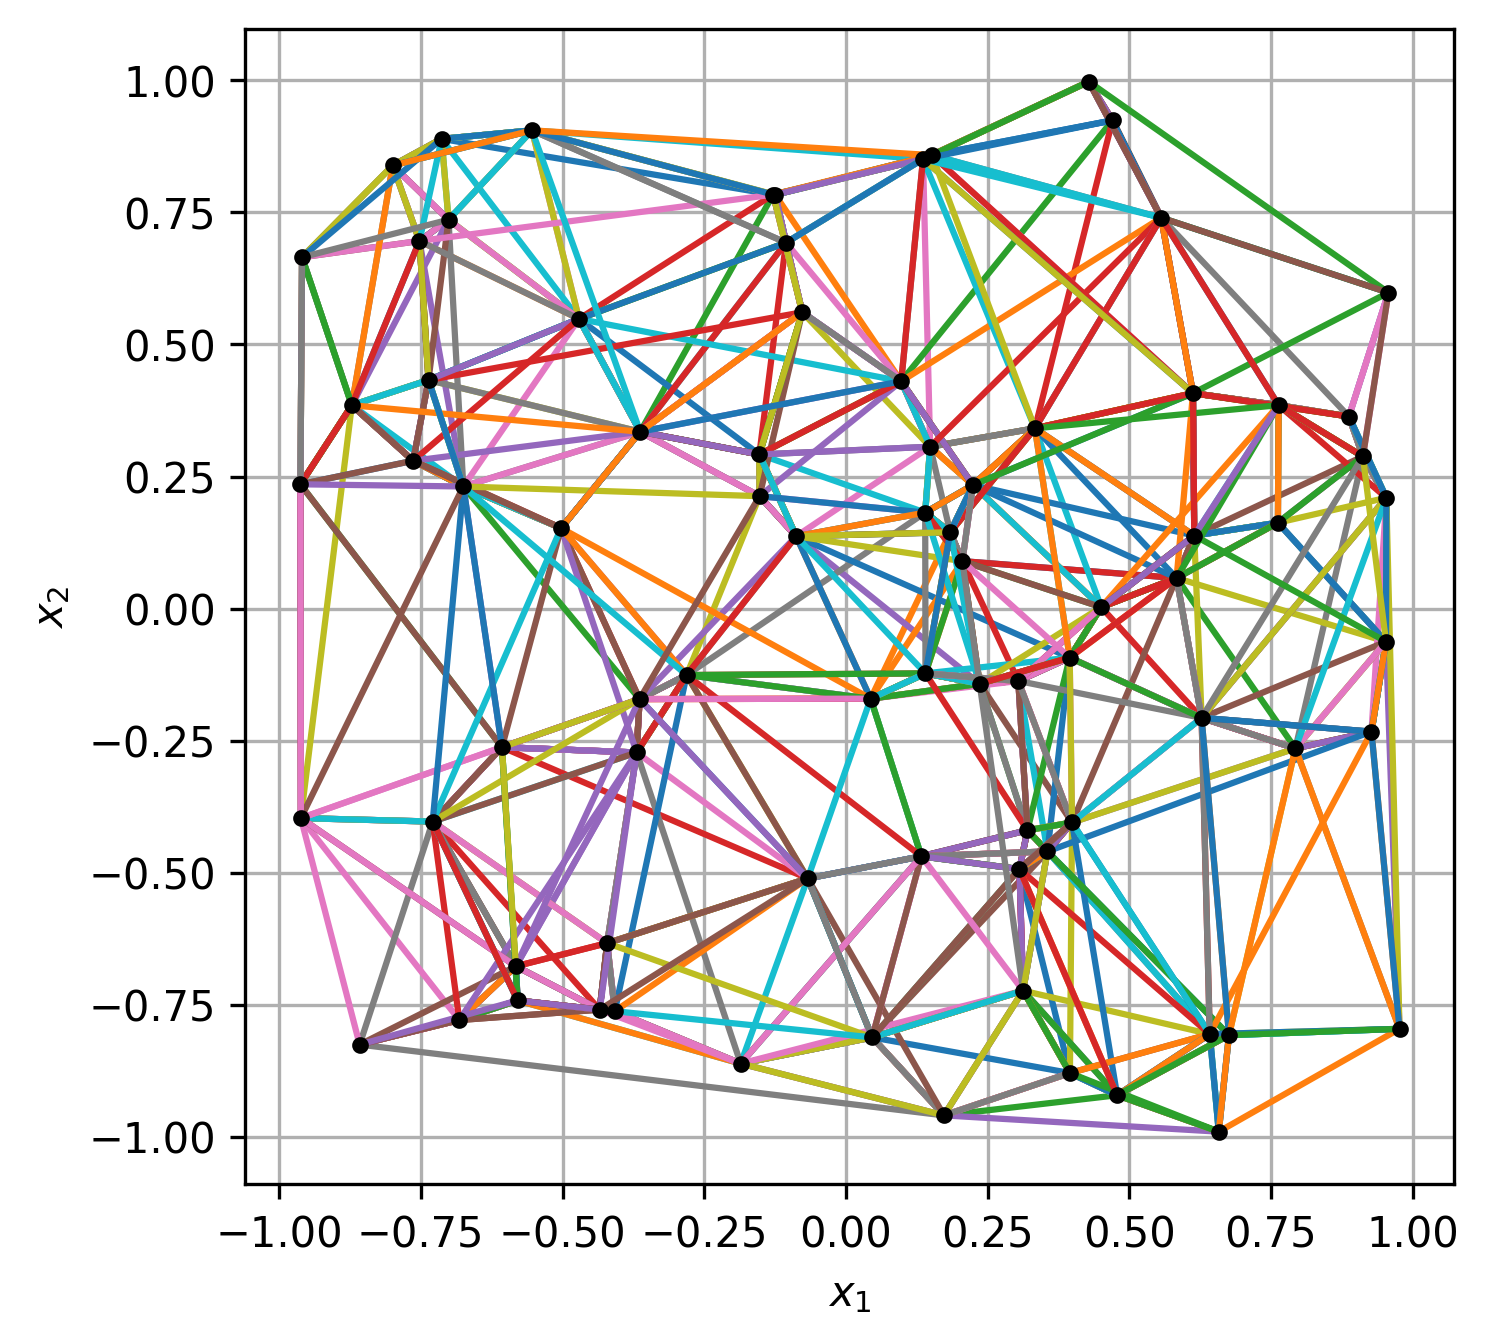

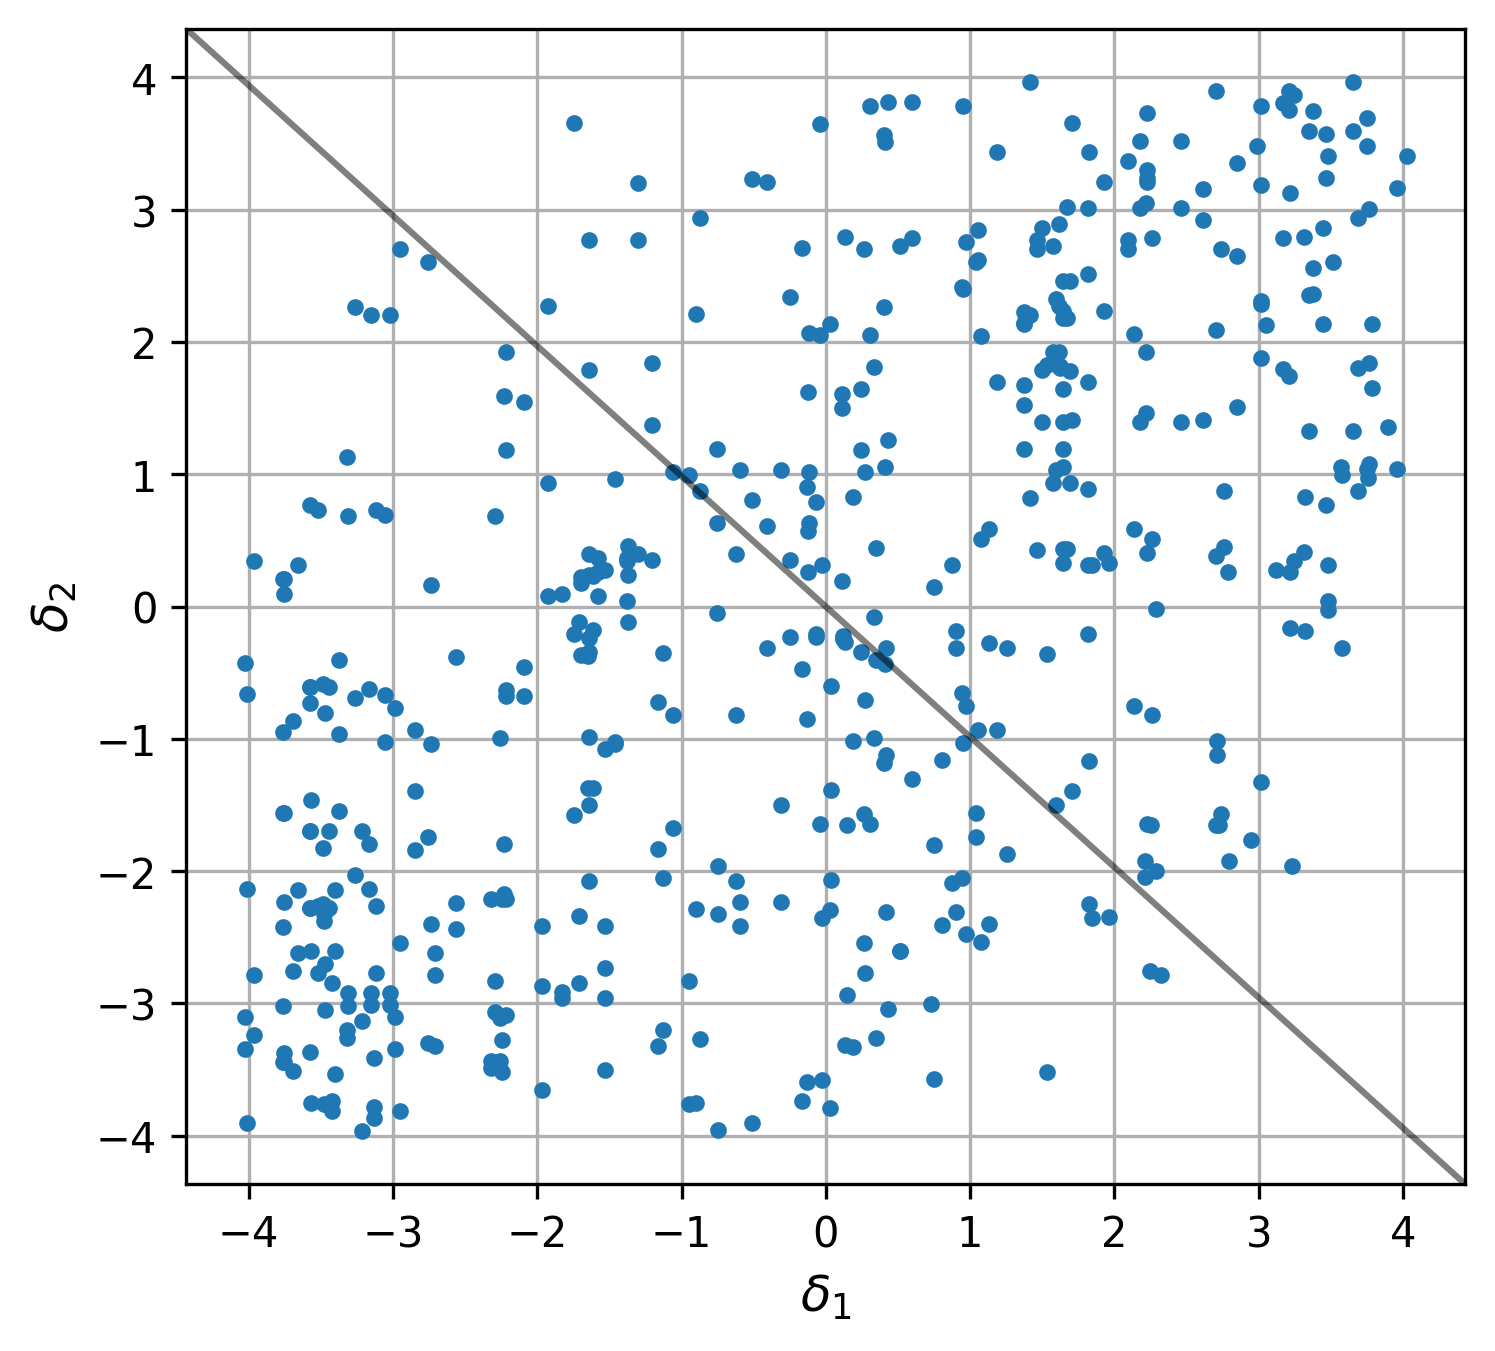

In [3]:

n = 81

problem: ProblemBase = problems.f1.exponential.Problem(2)
x, f = problem.sample_grid(n, seed=0, random_shift=0.6)

with set_timer() as timer:
    triples = vm_triples.collect_fixed_step(x)
n_triples = len(triples)
pprint_triples(f"grid collect_fixed_step", x, f, triples, timer.time)

with set_timer() as timer:
    triples = vm_triples.collect_space_filling(x, n_triples)
pprint_triples(f"grid collect_space_filling", x, f, triples, timer.time)

x, f = problem.sample_rand(n, seed=0)

with set_timer() as timer:
    triples = vm_triples.collect_fixed_step(x)
n_triples = len(triples)
pprint_triples(f"rand collect_fixed_step", x, f, triples, timer.time)

with set_timer() as timer:
    triples = vm_triples.collect_space_filling(x, n_triples)
pprint_triples(f"rand collect_space_filling", x, f, triples, timer.time)